In [1]:
import numpy as np 
import pandas as pd

## Data Cleaning
Input the transaction data.

In [2]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
transaction_data_backup = transaction_data.copy() #backup the data

In [3]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 15.2+ MB


The date is in interger type. Firstly convert the intergers into dates.

In [5]:
from datetime import datetime

def int_to_dates(excel_date):
    dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + excel_date - 2)
    return dt

transaction_data['DATE'] = transaction_data['DATE'].apply(int_to_dates)



Now we can check for the missing value. I ran a code which shows the number of missing values for all the data.

In [6]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

It looks like we dont have any missing value in this dataframe, so we do not need to take any extra procedures to handle missing data.

Next, we can check on the product column and check which are chips product. We will add a column next to PROD_NAME which whether the product is chips. Call it 'prod_is_chips'. Moreover, it seems that the size of the product and its brand name in 'PROD_NAME' can be also a useful information in determining customer's behaviour. Let's made columns 'SIZE' and 'BRAND' and enter the information.

In [7]:
# Check the entries in PROD_NAME
np.sort(transaction_data['PROD_NAME'].unique())

array(['Burger Rings 220g', 'CCs Nacho Cheese    175g',
       'CCs Original 175g', 'CCs Tasty Cheese    175g',
       'Cheetos Chs & Bacon Balls 190g', 'Cheetos Puffs 165g',
       'Cheezels Cheese 330g', 'Cheezels Cheese Box 125g',
       'Cobs Popd Sea Salt  Chips 110g',
       'Cobs Popd Sour Crm  &Chives Chips 110g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Dorito Corn Chp     Supreme 380g',
       'Doritos Cheese      Supreme 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Doritos Corn Chips  Cheese Supreme 170g',
       'Doritos Corn Chips  Nacho Cheese 170g',
       'Doritos Corn Chips  Original 170g', 'Doritos Mexicana    170g',
       'Doritos Salsa       Medium 300g', 'Doritos Salsa Mild  300g',
       'French Fries Potato Chips 175g',
       'Grain Waves         Sweet Chilli 210g',
       'Grain Waves Sour    Cream&Chives 210G',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Infuzi

In [8]:
#There is some SALSA product in the data hence we use the word salsa to filter out the non-chips product
transaction_data.insert(loc = 7,column="prod_is_chips",value = transaction_data['PROD_NAME'].apply(lambda s: not 'salsa' in s.lower()))
#except for 'Red Rock Deli SR    Salsa & Mzzrlla 150g'
transaction_data[transaction_data['PROD_NAME'] == 'Red Rock Deli SR    Salsa & Mzzrlla 150g']["prod_is_chips"] = True


In [9]:
def extract_num(str):
    a = ""
    for char in str:
        if char.isdigit():
         a+= char 
    return int(a)

transaction_data.insert(loc = 7, column="SIZE", value = transaction_data['PROD_NAME'].apply(extract_num))
transaction_data.insert(loc = 6, column="BRAND", value = transaction_data['PROD_NAME'].apply(lambda s: s.split()[0]))

In [10]:
#Inspect the Brands in alphabetical order
np.sort(transaction_data['BRAND'].unique())

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Old', 'Pringles', 'RRD', 'Red',
       'Smith', 'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos',
       'Twisties', 'Tyrrells', 'WW', 'Woolworths'], dtype=object)

In [11]:
# Notice that RRD the abbreviation of Red Rock Deli. Hence change Red to RRD in 'BRAND'
transaction_data['BRAND'].replace(to_replace = 'Red', value = 'RRD',inplace = True)
# Brand Smith is same as Smiths.
transaction_data['BRAND'].replace(to_replace = 'Smith', value = 'Smiths',inplace = True)
# Doritos same as Dorito
transaction_data['BRAND'].replace(to_replace = 'Dorito', value = 'Doritos',inplace = True)
# Infzns same as Infuzions
transaction_data['BRAND'].replace(to_replace = 'Infzns', value = 'Infuzions',inplace = True)
# Natural Chip Co abbreviated as NCC
transaction_data['BRAND'].replace(to_replace = 'Natural', value = 'NCC',inplace = True)
# Snbts same as Sunbites
transaction_data['BRAND'].replace(to_replace = 'Snbts', value = 'Sunbites',inplace = True)


In [12]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,SIZE,prod_is_chips,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,NCC,2,175,True,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,CCs,3,175,True,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths,2,170,True,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,5,175,True,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,3,150,True,13.8


In [13]:
# We remove the products that are not chips
transaction_data.drop(transaction_data[transaction_data['prod_is_chips']== False].index,inplace = True)

Next, as requested we need to check for the outliers. 

In [14]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,SIZE,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,175.585178,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,59.434727,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,70.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,150.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,170.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,175.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,380.000000,650.000000


In PRO_QTY and TOT_SALES, we see that the maximum value is very far from the mean value which could suggest the presense of the outlier. Investigate the rows which contains these datas.

In [15]:
transaction_data[(transaction_data['PROD_QTY']==200) | (transaction_data['TOT_SALES'] == 650) ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,SIZE,prod_is_chips,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,Doritos,200,380,True,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,Doritos,200,380,True,650.0


This outlier is originated from the same customer (by the loyalty card number). We should investigate this customer further.

In [16]:

transaction_data[(transaction_data['LYLTY_CARD_NBR'] == 226000)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,SIZE,prod_is_chips,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,Doritos,200,380,True,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,Doritos,200,380,True,650.0


It turns out that these are the only transaction processed by that customer. Since this member is not a regular shopper, this should be contributed to being an outlier and should be removed. After that, we investigate the summary of data again.

In [17]:
transaction_data.drop([69762,69763],inplace=True)

In [18]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,SIZE,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,175.583521,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,59.432118,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,70.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,150.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,170.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,175.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,380.000000,29.500000


The summary shows that there should not be any problem with the outlier. We shall output the processed data as a backup. (and saves time without executing the cells from above). After that, we shall examine the customer data.

In [19]:
transaction_data.to_csv('processed_transaction_data.csv',index= False)

In [20]:
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')
customer_data_backup = customer_data.copy()

In [21]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [22]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [23]:
customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Again, there is no missing data.
We can perhaps merge the customer data and the transaction data accroding to the loyalty card number for better comparison. Beforehand, let's check if missing value can be caused with merging due to the incomplete customer data. 

In [24]:
transaction_data['LYLTY_CARD_NBR'].nunique() #check all the customers involved in the transaction data

71287

We have 72637 members in our customer data, and 1 out of them is not involved in the transaction data (i.e it could be the customer which causes the outliers in our data). Hence we will not have problem merging the dataframes in this way. 

Before merging, let's look at the LIFESTAGE data. It includes the age and the marital status of the customer. Could it be possible that we can separate them to enable better comparison of our data?

In [25]:
customer_data['LIFESTAGE'].unique() #looking at the types of data in the lifestage column

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

It looks like it is not a good idea to do it, as values 'RETIREES' and 'NEW FAMILIES' do not specify the age range. Now, two dataframes will be combined.  

In [26]:
combined_data = pd.merge(customer_data,transaction_data,on='LYLTY_CARD_NBR').sort_values(by = 'DATE')

In [27]:
combined_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,SIZE,prod_is_chips,TOT_SALES
16052,21037,RETIREES,Mainstream,2018-07-01,21,17576,62,Pringles Mystery Flavour 134g,Pringles,2,134,True,7.4
19786,25040,OLDER FAMILIES,Budget,2018-07-01,25,21704,87,Infuzions BBQ Rib Prawn Crackers 110g,Infuzions,2,110,True,7.6
50749,59236,OLDER SINGLES/COUPLES,Budget,2018-07-01,59,55555,42,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,2,150,True,7.8
245312,271083,YOUNG FAMILIES,Budget,2018-07-01,271,268688,97,RRD Salt & Vinegar 165g,RRD,2,165,True,6.0
56344,65015,YOUNG FAMILIES,Premium,2018-07-01,65,61737,17,Kettle Sensations BBQ&Maple 150g,Kettle,2,150,True,9.2


## Data Analysis
We shall analyse the data here now.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

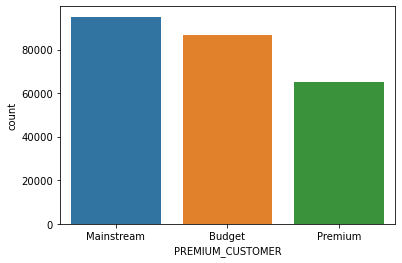

In [29]:
sns.countplot(x = 'PREMIUM_CUSTOMER',data = combined_data)

This bar chart shows the number of premium customers in each category involved in chip purchase. It seems that mainly the Mainstream and Budget customers purchased chips in our store. 

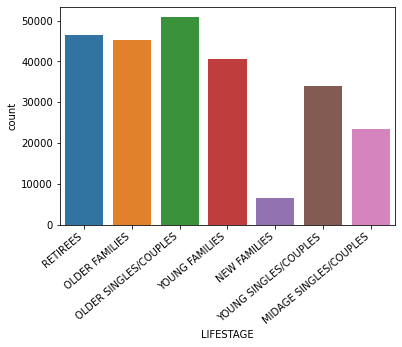

In [30]:
fig1 = sns.countplot(x = 'LIFESTAGE', data = combined_data)
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=40, ha="right")
fig1

Then, we look at the same count but based on their life stage on fig1. Dominantly, retirers, older families and older singles/couples contribute the most of the chip transactions. One of the prominant notice is that the tiny portion oringinated from new families and midage singles/couples. We shall investigate the total sales later to further verify our observation. Additionally, fig2 shows the transaction counts by taking the lifestage and the premium customer membership category into account. The pattern is quite consistent to the bar chart on the very top, as we can see that Premium level customer appears the least in all the lifestage categories.

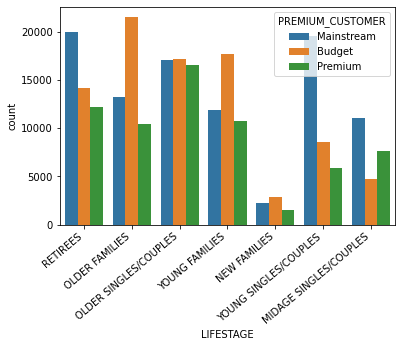

In [31]:
fig2 = sns.countplot(x = 'LIFESTAGE', data = combined_data, hue='PREMIUM_CUSTOMER')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=40, ha="right")
fig2

Let's investigate on the total sale below. The box chart on the left in fig3a shows a very consistent phenomon. Regardless of the membership category or their lifestage, the distribution produced is fairly similar. (Exceptions on young singles/couples and midage single/couples - the distribution on Budget and Premium is more spread out and slightly towards the lower end) In other words, commonly a typical customer contributes around GBP 5-10 for buying chips. The heatmap on the right (fig3b) sums up the total sales for each portion. Despite similarity shown on the left, the discrepency is rather obvious on the right, which could caused by activeness of customers in the bar charts above. In particular, new families, budget and premium member from midage singles/couples and from young single/couples perform poorly in terms of total sales while the older group and mainstream member from young singles/couples contribute the most to the sales from chip purchase.

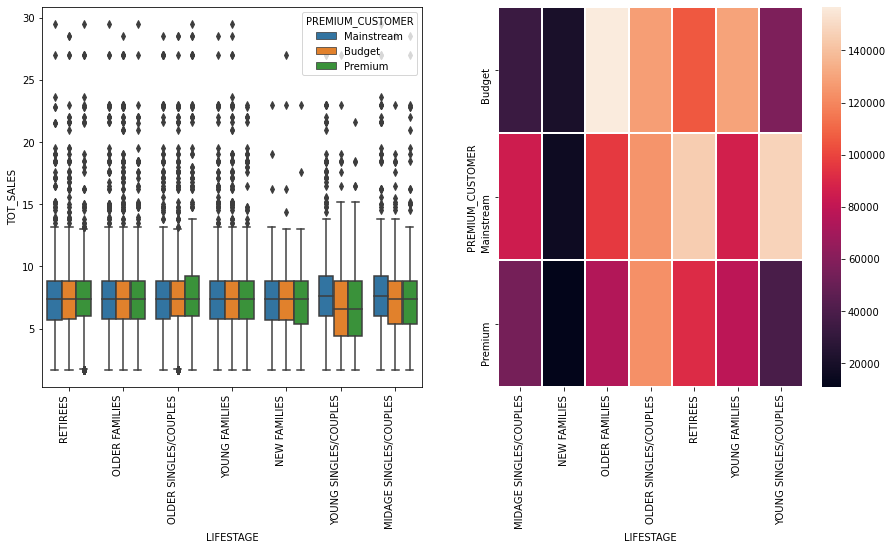

In [32]:
fig3,axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,7))
fig3a = sns.boxplot(x='LIFESTAGE' ,y='TOT_SALES', data = combined_data, hue = 'PREMIUM_CUSTOMER' ,ax = axes[0])
fig3a.set_xticklabels(fig3a.get_xticklabels(), rotation=90, ha="right")
pivt = combined_data.pivot_table(values= 'TOT_SALES', index= 'PREMIUM_CUSTOMER', columns= 'LIFESTAGE',aggfunc='sum')
fig3b = sns.heatmap(pivt,linewidths=1, ax = axes[1])

Looking at the figures above, it is suggested that we can target people in older families and young singles/couples categories. Those are one of the groups that generates the most profits, but portrays bigger gaps of difference across different membership comparing to other well-performed groups. This means that there is a room of improvement on chips' sales in those lifestages. We shall describe the purchase behaviour exhibited from them so that we can tailor our strategy plan to them. 

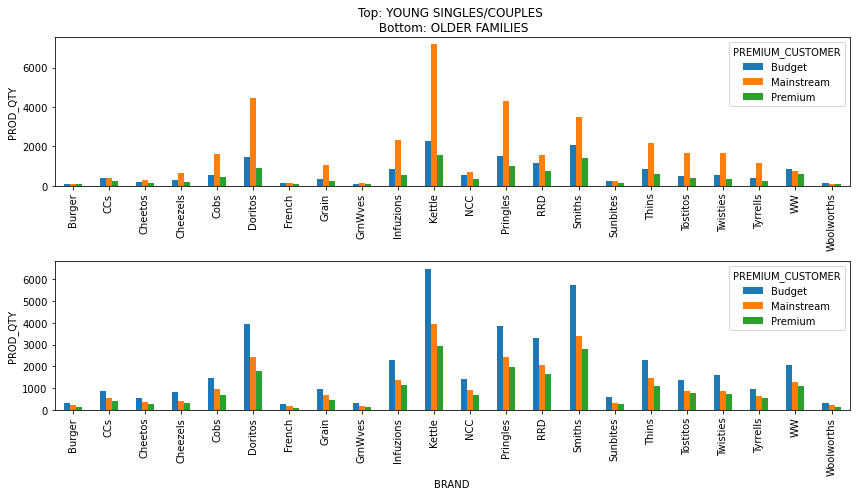

In [33]:
fig41, axes = plt.subplots(nrows= 2, ncols = 1, figsize=(12,7)) 
brand_data1 = combined_data[combined_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'].groupby(['BRAND','PREMIUM_CUSTOMER']).sum()
fig4a = brand_data1.unstack().plot(kind = 'bar',y = 'PROD_QTY',ax = axes[0])
fig4a.set_ylabel('PROD_QTY')
fig4a.set_xlabel(None)

brand_data2 = combined_data[combined_data['LIFESTAGE'] == 'OLDER FAMILIES'].groupby(['BRAND','PREMIUM_CUSTOMER']).sum()
fig4b = brand_data2.unstack().plot(kind = 'bar',y = 'PROD_QTY',ax = axes[1])
fig4b.set_ylabel('PROD_QTY')
fig4a.set_title('Top: YOUNG SINGLES/COUPLES \n Bottom: OLDER FAMILIES')

plt.tight_layout()

The bar chart is produced based on number of the product sold on each brand. Overall, Kettle is the best-selling chips brand, dominating on other brands regardles of the lifestage or the membership. However, the trend differ slightly depending on the membership. For the young singles/couples, Smiths is the second best-selling brand for mainstream and premium, although ranked third for the mainstream. Smiths is also the second best in the older family category. On the other hand, Pringles, second best-selling in young mainstream, appears to be the third best for older families premium, while ranked lower for other memberships. To conclude It seems like promoting Pringles and Smiths would be a good idea to increase the profits from these lifestage categories.

In [34]:
# this function returns a list of size, where the count of each element equals to the product quantity
# use the list for the distplot()
def sum_counts(LIFESTAGE,PREMIUM_CUSTOMER):
    dataa = combined_data[(combined_data['LIFESTAGE'] == LIFESTAGE) & (combined_data['PREMIUM_CUSTOMER'] == PREMIUM_CUSTOMER)].groupby('SIZE').sum()
    lst = np.array([])
    for size in dataa.index:
        list_a = np.array([size]*int(dataa.loc[size]['PROD_QTY']))
        lst = np.append(lst,list_a)
    return lst
    


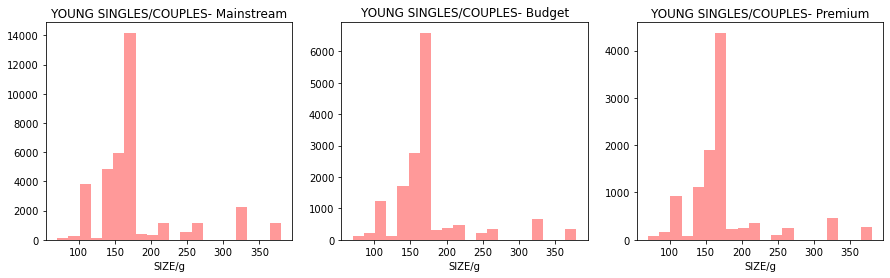

In [35]:
fig5, axe = plt.subplots(nrows = 1, ncols= 3, figsize =(15,4) )
for i in range(3):
    fig = sns.distplot(sum_counts('YOUNG SINGLES/COUPLES',combined_data['PREMIUM_CUSTOMER'].unique()[i]),kde=False, ax = axe[i], bins = 20, color= 'red')
    fig.set_title('YOUNG SINGLES/COUPLES- '+combined_data['PREMIUM_CUSTOMER'].unique()[i])
    fig.set_xlabel('SIZE/g')


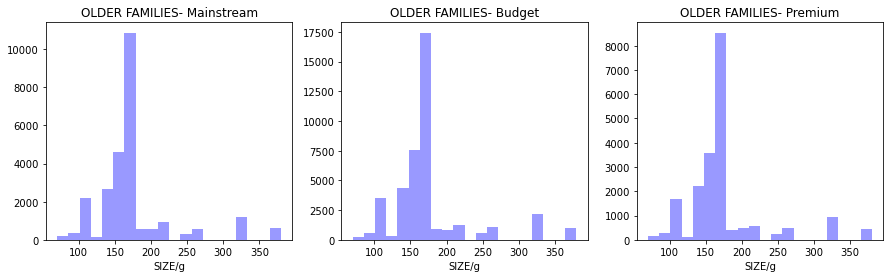

In [36]:
fig5, axe = plt.subplots(nrows = 1, ncols= 3, figsize =(15,4) )
for i in range(3):
    fig = sns.distplot(sum_counts('OLDER FAMILIES',combined_data['PREMIUM_CUSTOMER'].unique()[i]),kde=False, ax = axe[i], bins = 20, color= 'blue')
    fig.set_title('OLDER FAMILIES- '+combined_data['PREMIUM_CUSTOMER'].unique()[i])
    fig.set_xlabel('SIZE/g')

The histograms above shows the distributions of size of the chips pack according to the quantitity of each being purchased. There isn't any unique observation appeared in any of the plot, but generally customers opt for chips in size between 150 and 180 approximately.  